# Flight Price Prediction 

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#importing dataset

df = pd.read_excel("Data_Train.xlsx")

#### Data viewing 

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#to check null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
#Now data doesn't have any null values

### Performing EDA

In [11]:
#In info we can see that date of journery is an object, so need to convert into date time format

In [12]:
#For extracting date
df["Date"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.day

In [13]:
#For extracting month
df["Month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [14]:
#viewing head to check  
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
#dropping date of journey column
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [16]:
#similarly for making of departure time in hours & mins

df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [17]:
#similarly for making of arrival time in hours & time

df["Arr_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arr_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [18]:
#viewing dataset after applying 
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
#for makind duration in format, we can list it & perform the operation
Duration = list(df["Duration"])

for i in range(len(Duration)):
    if len(Duration[i].split()) != 2:    #to verify that it contains 2 things (hrs & min)
        if "h" in Duration[i]:
            Duration[i] = Duration[i].strip() + " 0m"   #adds mintues if it is 0
        else:
            Duration[i] = "0h " + Duration[i]           #add hour if it is 0 

Duration_hours = []
Duration_mintues = []
for i in range(len(Duration)):
    #for hours
    Duration_hours.append(int(Duration[i].split(sep = "h")[0]))
    #for mintues 
    Duration_mintues.append(int(Duration[i].split(sep = "m")[0].split()[-1]))

In [20]:
#adding duration to dataframe

df["Duration_hours"] = Duration_hours
df["Duration_mintues"] = Duration_mintues

df.drop(["Duration"], axis = 1, inplace = True)

In [21]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mintues
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Now we have to convert every categorical data into numerical data

In [22]:
#lets visualize the data & counts
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

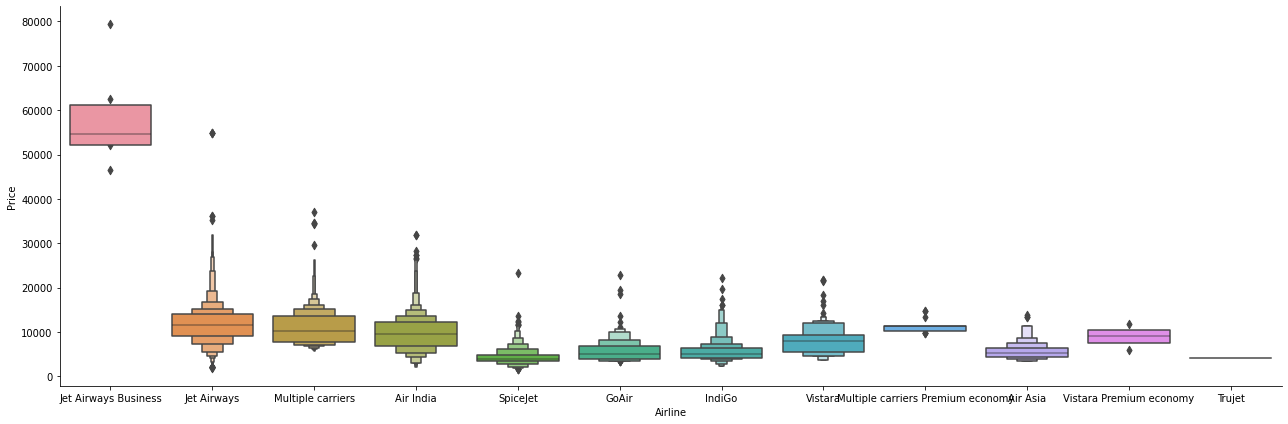

In [23]:
#visualizing with compare to price 
sns.catplot(x = "Airline", y = "Price", data = df.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [24]:
#we can perform one hot encoding by creating dummie variable 

Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline)

In [25]:
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [26]:
#now for source 
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

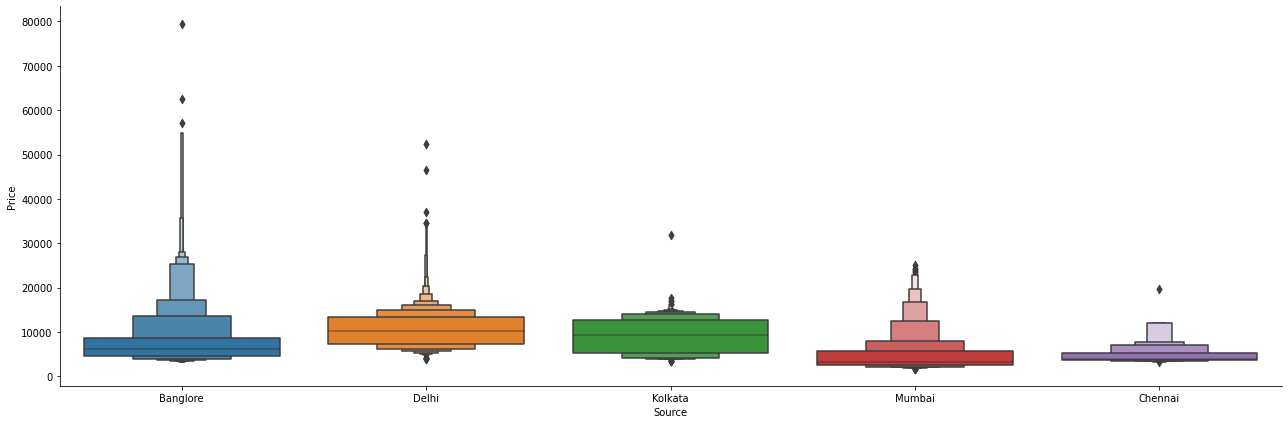

In [27]:
#viewing source vs price
sns.catplot(x = "Source", y = "Price", data = df.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [28]:
#similary creating dummies for this

Source = df[["Source"]]
Source = pd.get_dummies(Source)

In [29]:
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [30]:
#for destination 
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

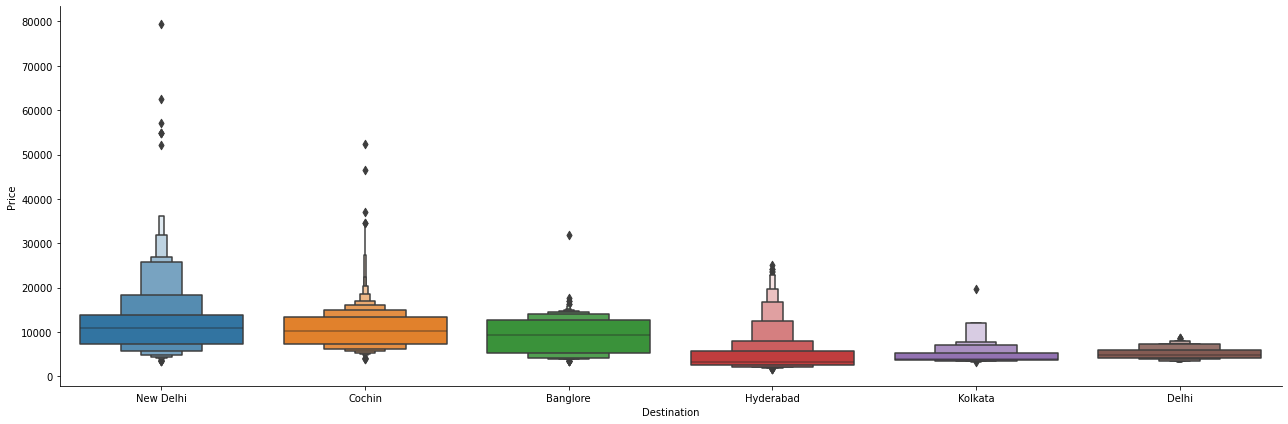

In [31]:
#viewing destination vs price
sns.catplot(x = "Destination", y = "Price", data = df.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [32]:
#creating dummies variable 

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination)

In [33]:
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [34]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [35]:
#we can drop additonal info column as it doesn't have more data
df.drop(["Additional_Info"], axis = 1, inplace = True)

In [36]:
#for routes 
df["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [37]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
#we can replace stop data with value & drop route column
df.drop(["Route"], axis = 1, inplace = True)
df.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)

In [39]:
#dropping source, destination & airline column 

df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [40]:
#concatenate encoded source, destination, & flight
df_train = pd.concat([df, Airline, Source, Destination], axis =1)

In [41]:
df_train

,Total_Stops,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mintues,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [42]:
#our train data is ready 

## Test set

In [43]:
#import test set
dft = pd.read_excel("Test_set.xlsx")

In [44]:
dft

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


### Preprocessing of data 

In [45]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


#### Now we will perform the preprocessing in the test set, the  way we followed in train set on date of journery, departure time, arrival time, duration, creating dummies variable in airline, source, destination.

In [46]:
dft.isnull().sum()
#no null values present so no need to drop any column 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [47]:
#date & month of journey

dft["Journey_day"] = pd.to_datetime(dft.Date_of_Journey, format = "%d/%m/%Y").dt.date
dft["Journey_month"] = pd.to_datetime(dft.Date_of_Journey, format = "%d/%m/%Y").dt.month
dft.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [48]:
#departure time

dft["Departur_hour"] = pd.to_datetime(dft.Dep_Time).dt.hour
dft["Departure_minute"] = pd.to_datetime(dft.Dep_Time).dt.minute
dft.drop(["Dep_Time"], axis =1, inplace = True)


In [49]:
#arrival time

dft["Arrival_hour"] = pd.to_datetime(dft.Arrival_Time).dt.hour
dft["Arrival_minute"] = pd.to_datetime(dft.Arrival_Time).dt.minute
dft.drop(["Arrival_Time"], axis =1, inplace = True)

In [50]:
#calculating duration 
Duration = list(dft["Duration"])

for i in range(len(Duration)):
    if len(Duration[i].split()) != 2:    
        if "h" in Duration[i]:
            Duration[i] = Duration[i].strip() + " 0m"   
        else:
            Duration[i] = "0h " + Duration[i]            

Duration_hours = []
Duration_mintues = []
for i in range(len(Duration)):
    
    Duration_hours.append(int(Duration[i].split(sep = "h")[0]))
     
    Duration_mintues.append(int(Duration[i].split(sep = "m")[0].split()[-1]))
    
dft["Duration_hours"] = Duration_hours
dft["Duration_minutes"] = Duration_mintues 
dft.drop(["Duration"], axis = 1, inplace = True)

In [51]:
#creating dummies for airline

Airline = pd.get_dummies(dft.Airline)

In [52]:
#destination

Destination = pd.get_dummies(dft.Destination)

In [53]:
#source 

Source = pd.get_dummies(dft.Source)

In [54]:
#replacing total_stops 
dft.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)

In [55]:
dft.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [56]:
#dropping additional_info

dft.drop(["Additional_Info"], axis = 1, inplace = True)

In [57]:
df_test = pd.concat([dft, Airline, Source, Destination], axis=1)

In [58]:
df_test

,Route,Total_Stops,Journey_day,Journey_month,Departur_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,DEL → BOM → COK,1,2019-06-06,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,CCU → MAA → BLR,1,2019-05-12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,DEL → BOM → COK,1,2019-05-21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,DEL → BOM → COK,1,2019-05-21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,BLR → DEL,0,2019-06-24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,CCU → DEL → BLR,1,2019-06-06,6,20,30,20,25,23,55,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2667,CCU → BLR,0,2019-03-27,3,14,20,16,55,2,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2668,DEL → BOM → COK,1,2019-03-06,3,21,50,4,25,6,35,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2669,DEL → BOM → COK,1,2019-03-06,3,4,0,19,15,15,15,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### To corelate selection 

In [59]:
df_train.shape

(10682, 33)

In [60]:
df_train.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mintues',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [61]:
X = df_train.loc[:,['Total_Stops', 'Date', 'Month', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mintues',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'] ]

In [62]:
X

,Total_Stops,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mintues,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [63]:
y = df_train.loc[:, "Price"]

In [64]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

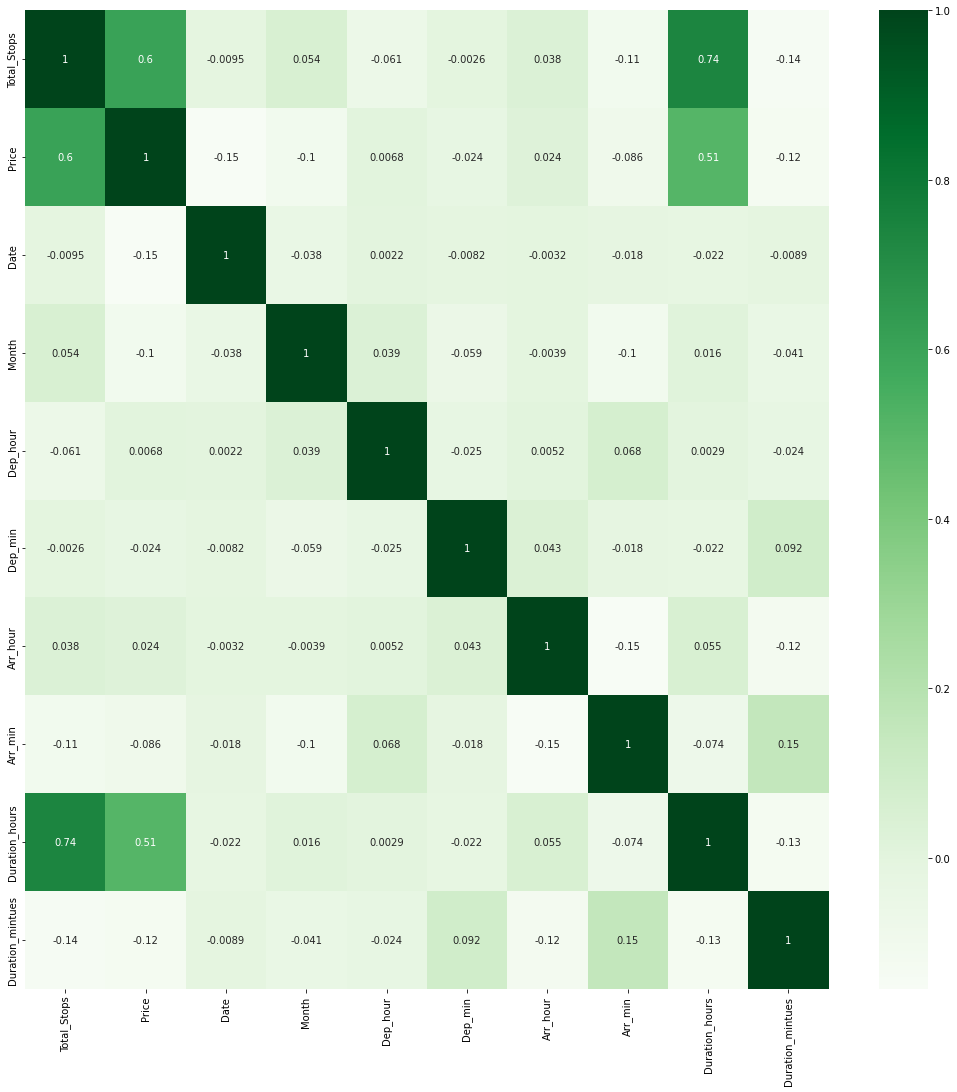

In [65]:
#finding correlation 
plt.figure(figsize = (18, 18))
sns.heatmap(df.corr(), annot = True, cmap = "Greens")

plt.show()

In [66]:
#to know the importance of every feature we use ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

In [67]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [68]:
print(selection.feature_importances_)

[2.34171895e-01 1.43404137e-01 5.33352642e-02 2.42275527e-02
 2.09118764e-02 2.87784120e-02 1.96525267e-02 1.16828095e-01
 1.77026726e-02 1.89655407e-03 1.00011882e-02 1.78663495e-03
 1.73542390e-02 1.36638766e-01 6.74136202e-02 1.87302817e-02
 7.93294170e-04 2.87362977e-03 1.10251529e-04 4.86993035e-03
 7.96960413e-05 8.50152536e-03 4.03337253e-04 1.10342681e-02
 1.85604404e-03 5.84054966e-03 1.73878433e-03 1.20314236e-02
 1.27122387e-02 6.81528718e-03 4.21438136e-04 1.70845855e-02]


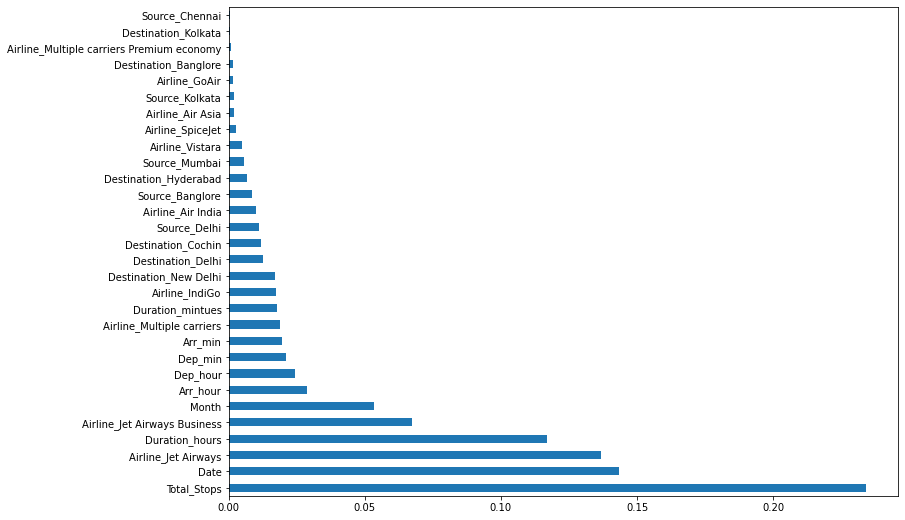

In [69]:
#visualy visualizing 

plt.figure(figsize = (12, 9))
feature = pd.Series(selection.feature_importances_, index = X.columns)
feature.nlargest(30).plot(kind = "barh")
plt.show()

### Training Model

In [70]:
#using random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [71]:
#splitting of training model & using RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
y_pred = rf.predict(X_test)

In [73]:
#knowing traning accuracy score
rf.score(X_train, y_train)

0.9516956444917706

In [74]:
#knowing test accuracy score
rf.score(X_test, y_test)

0.8248729877778969

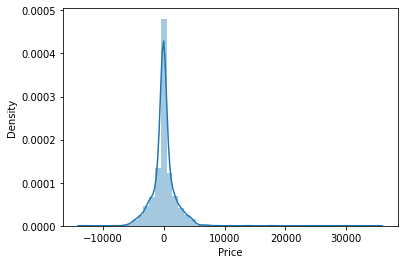

In [75]:
#visualizing test data

sns.distplot(y_test - y_pred)
plt.show()

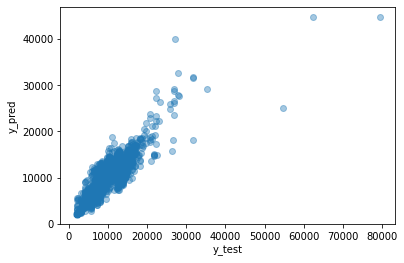

In [76]:
#comparing y_test vs y_pred

plt.scatter(y_test, y_pred, alpha = 0.4)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [77]:
#checking score of errors

from sklearn import metrics

In [78]:
#in terms of number 
print(f"Mean absolute error is: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error is: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root mean absolute error is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean absolute error is: 1176.9793268862882
Mean squared error is: 4098748.453139278
Root mean absolute error is: 2024.536602074479


In [79]:
#score of metrics

metrics.r2_score(y_test, y_pred)

0.8248729877778969

### To maximize model performance & minimize the loss, we will do hyperparameter tuning

In [80]:
#importing 
from sklearn.model_selection import RandomizedSearchCV

In [81]:
#number of tress
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#feature to be considered
max_features = ["auto", "sqrt"]

#maximum level of tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#minimum way which splitting is required 
min_samples_split = [2, 5, 10, 15, 100]

#minimum nuber of samples required at each leaf mode
min_samples_leaf = [1, 2, 5, 10]

In [82]:
#creating the random grid

random_grid = {"n_estimators" : n_estimators, "max_features":max_features, "max_depth" : max_depth, "min_samples_split" : min_samples_split, "min_samples_leaf" : min_samples_leaf}

In [83]:
#using 100 different combination 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = "neg_mean_squared_error", n_iter = 10, cv = 5, verbose = 2)

In [84]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  34.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  36.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [85]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [86]:
y_predict = rf_random.predict(X_test)

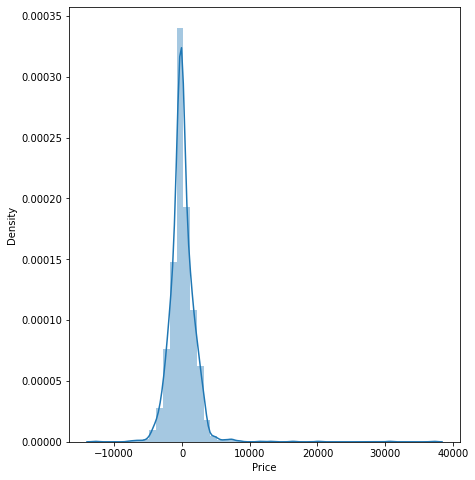

In [87]:
#visualizing data 

plt.figure(figsize= (7, 8))
sns.distplot(y_test - y_predict)
plt.show()

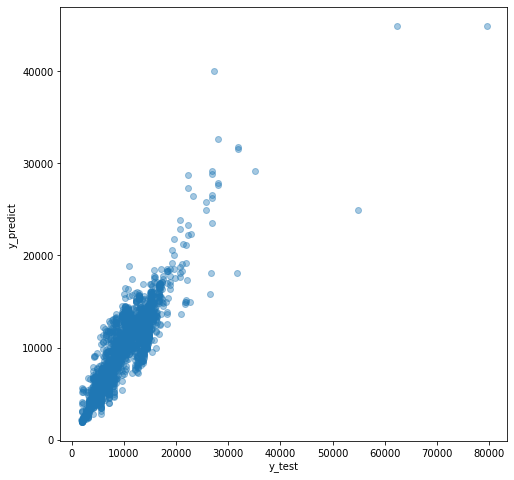

In [88]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.show()

In [89]:
#now knowing error 

print(f"Mean absolute error is: {metrics.mean_absolute_error(y_test, y_predict)}")
print(f"Mean squared error is: {metrics.mean_squared_error(y_test, y_predict)}")
print(f"Root mean absolute error is: {np.sqrt(metrics.mean_squared_error(y_test, y_predict))}")

Mean absolute error is: 1254.4297780486943
Mean squared error is: 4030978.1117381463
Root mean absolute error is: 2007.7295912891623


### model is ready 

In [90]:
#save it 
import pickle
file = open("flight_price_pred", "wb")
pickle.dump(rf, file)

In [92]:
model = open("flight_price_pred.pkl", "rb")
forest = pickle.load(model)

FileNotFoundError: [Errno 2] No such file or directory: 'flight_price_pred.pkl'